In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("abalone.csv")

In [59]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [60]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

As we can say sex is in object type so we need to convert it in numeric type for prediction

So we will create features as Male : 1, Female : 2, and Infant : 3

In [61]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

Checking the dtypes again.

In [62]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We need to check the datashape and columns in the dataframe.

In [63]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [64]:
df.shape

(4177, 9)

Check the summary of the dataframe

In [65]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Check the missing values

In [66]:
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Now we will add a column in dataframe for classification and will classify age on the basis of number of rings.

In [67]:
def label_race (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings'] >=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0

In [68]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [69]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)

In [70]:
df.Sex = df.Sex.astype(float)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [71]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


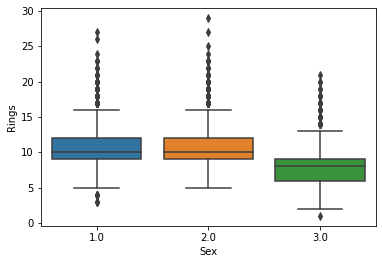

In [72]:
ax = sns.boxplot(x="Sex", y="Rings", data=df)
plt.show()

From above box plot we have observed that infacts has less rings as compared to male and females

Now we will perform classification.

From the dataframe we can say the response variable is Age.

In [73]:
Y = df[['Age']]
Y

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


Predictor variables obtained by dropping rings and age from the dataframe.

In [74]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


Now we will find correlation between the features.

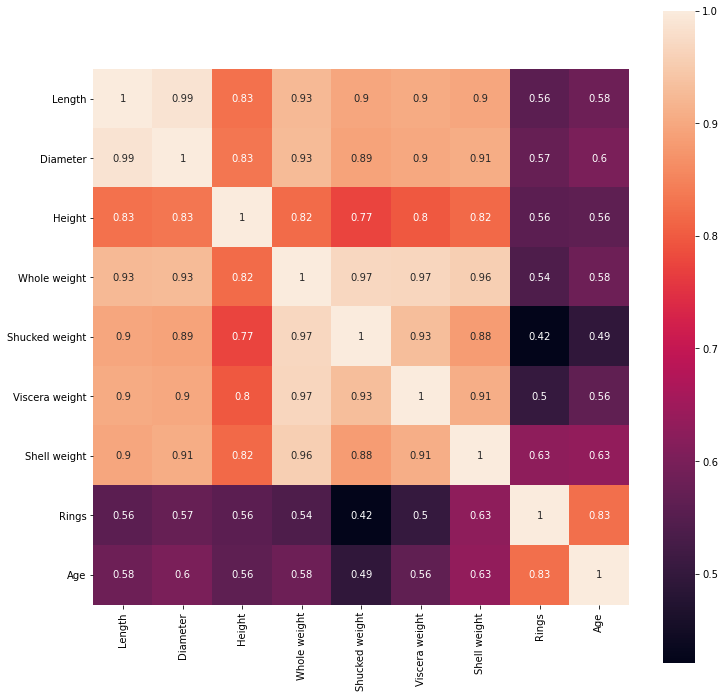

In [75]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True, annot= True)
plt.show()

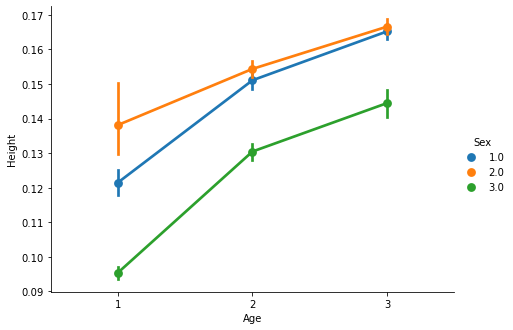

In [76]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, size = 4.5, aspect = 1.4)
plt.show()

From above factor graph we can observe that female abalones have largest height. Male abalones have height ranging from 0.12 to 0.15mm

Spliting the data into train and test.

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 2)
Shape of x_test : (200, 2)
Shape of y_train : (800,)
Shape of y_test : (200,)


Finding the best model.

1.Random Forest Regressor   

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

#to calculate confusion matrix
print(("Confusion Matrix") %(confusion_matrix(y_test, y_pred)))

#classification report
print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, classification_report(y_test, y_pred)))

RMSE : 0.0
R2 Score : 1.0
Confusion Matrix
Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200





2.KNN Classifier

In [79]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

#calculate Confusion Matrix
print("Confusion Matrix" % (confusion_matrix(y_test, y_pred)))

print("Accuracy of KNN Classifier is:")
print(accuracy_score(y_test, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(y_test,y_pred);
print("MAE:"+str(mae))

#Median Absolute error
Medae=median_absolute_error(y_test,y_pred)
print("Median Absolute Error:"+str(Medae))  


print("Classification report for Test data %s:\n%s\n\n"
     % (clf, classification_report(y_test, y_pred)))

Confusion Matrix
Accuracy of KNN Classifier is:
100.0
MAE:0.0
Median Absolute Error:0.0
Classification report for Test data KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200





As we can both the model are giving same accuracy so both are the best model.